In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
# Load the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#cleaning the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = (df['job_skills']
                    .apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else [])
                    )

In [13]:
from adjustText import adjust_text

In [3]:
df.head(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,[],None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","[sql, python, java, sql server, gcp, bigquery,...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
7,Data Engineer,Data Engineer,Anywhere,via LinkedIn,Full-time,True,Romania,2023-12-07 13:40:49,False,False,Romania,None,NaN,NaN,Zitec,"[sql, nosql, gcp, azure, aws, bigquery, databr...","{'cloud': ['gcp', 'azure', 'aws', 'bigquery', ..."
8,Business Analyst,Technology & Operations Business Analyst,"Copenhagen, Denmark",via Trabajo.org,Full-time,False,Denmark,2023-06-05 13:44:34,False,False,Denmark,None,NaN,NaN,Hempel,"[excel, powerpoint, power bi]","{'analyst_tools': ['excel', 'powerpoint', 'pow..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."


In [4]:
df_test = df.copy()

In [5]:
df_test = df_test.explode('job_skills')

In [6]:
top_10=df_test['job_skills'].value_counts().head(10).index.tolist()
top_10

['sql',
 'python',
 'aws',
 'azure',
 'r',
 'tableau',
 'excel',
 'spark',
 'power bi',
 'java']

In [7]:
df_test = df_test[df_test['job_title_short']=='Data Analyst']

In [8]:
df_test.groupby('job_skills').size()

job_skills
airflow       2002
airtable        88
alteryx       4570
angular        376
angular.js       2
              ... 
wrike           39
wsl             16
xamarin          2
yarn            76
zoom           465
Length: 235, dtype: int64

In [9]:
skill_stats = df_test.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    Median_Salary = ('salary_year_avg', 'median')
)
skill_count = 20
top_skill_stats=skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)

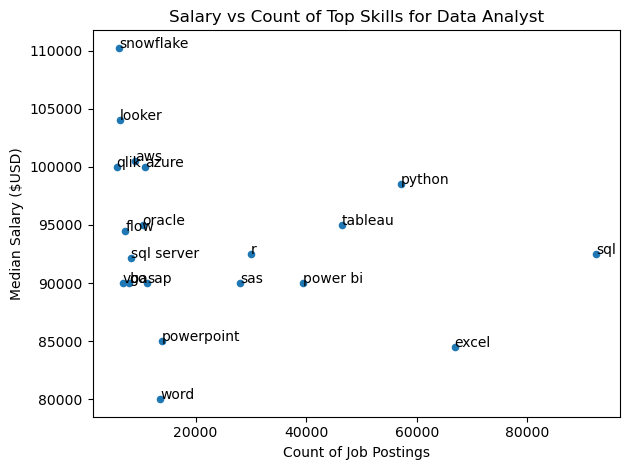

In [11]:
top_skill_stats.plot(kind='scatter',x='skill_count', y='Median_Salary')
plt.title('Salary vs Count of Top Skills for Data Analyst')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Salary ($USD)')
for i, txt in enumerate(top_skill_stats.index):
    plt.annotate(txt, (top_skill_stats['skill_count'].iloc[i], top_skill_stats['Median_Salary'].iloc[i]))
plt.tight_layout()
plt.show()

#### Updates are shown here

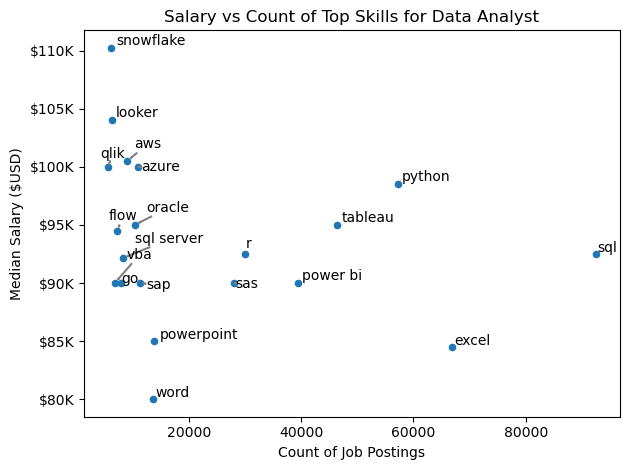

In [20]:
top_skill_stats.plot(kind='scatter',x='skill_count', y='Median_Salary')
texts = []
for i, txt in enumerate(top_skill_stats.index):
    texts.append(
        plt.annotate(txt, (top_skill_stats['skill_count'].iloc[i], top_skill_stats['Median_Salary'].iloc[i]))
        )

adjust_text(texts, arrowprops = dict(arrowstyle='->', color='gray', lw=1.5))
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos : f'${int(y/1000)}K'))
plt.title('Salary vs Count of Top Skills for Data Analyst')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Salary ($USD)')
plt.tight_layout()
plt.show()